In [22]:
# import libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split

In [23]:
df_pre = pd.read_csv("data.csv")
df_pre = df_pre.loc[:, ~df_pre.columns.str.contains('^Unnamed')]
#took out a column that was called Unamed and had no data in it

We chose a dataset that dealt with breast cancer. Essentially there are a lot of varibles that were measured for individuals and we are trying to see how these measurements correlate to someone having a malignant tumor.

According to breastcancer.org 1 in 8 women develop invasive breast cancer over their lifetime.

Due to the infamousy of breast cancer we wanted to see of we could use classification algoritms 
to determine if an individual has a malignant tumor based on pre measured variabled.

In [24]:
df_pre.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df = pd.DataFrame()
df["is_Malignant"] = df_pre["diagnosis"].apply(lambda x: bool(x=='M'))
for var in df_pre.select_dtypes(include='float'):
    df[var] = df_pre[var].apply(lambda x: float(x))

df.head()
#made is_Malignant a bool for when the value in the predefined "diagnosis" column was "M"
#the diagnosis column turned into "is_Malignant" and has a value of true if "M" and flase otherwise

,is_Malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
for var in df.columns:
    if len(df[var]) != len(df[var].dropna()):
        print(var)
print('Done')
#check to see if there are any Na's

Done


In [27]:
df.corr()['is_Malignant'].sort_values()
# output of correllation of each feature compared to is_Malignant sorted from highest to 
# lowest so we can get some idea of what features have high correlation.
#This part gave us a lot insignt for what features would correspond to the outcome of having a malignant tumor
# Suprisingly there were only 5 features that had correlation under 25%

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [28]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


False    357
True     212
Name: is_Malignant, dtype: int64

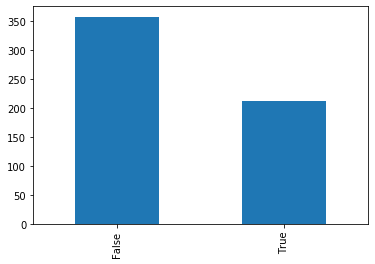

In [29]:
df["is_Malignant"].value_counts().plot(kind="bar")
df["is_Malignant"].value_counts()
#plot to easily see how many individuals have a malignant tumor or a benign tumor
# 357 had a benign and 212 had a malignant tumor

In [30]:
def malig(var):
    figure = plt.figure(figsize = (25,7))
    plt.hist([df[df["is_Malignant"] == 1][var], df[df["is_Malignant"] == 0][var]],
            stacked = True, color =['g','r'],bins = 50, label = ["is_Malignant","Benign"])
    plt.xlabel(var)
    plt.ylabel("Number of Individuals")
    plt.legend();
# function to plot the number of inidvuduals who have a specified feature, and with that feature either have a 
# malignant tumor or a benign tumor

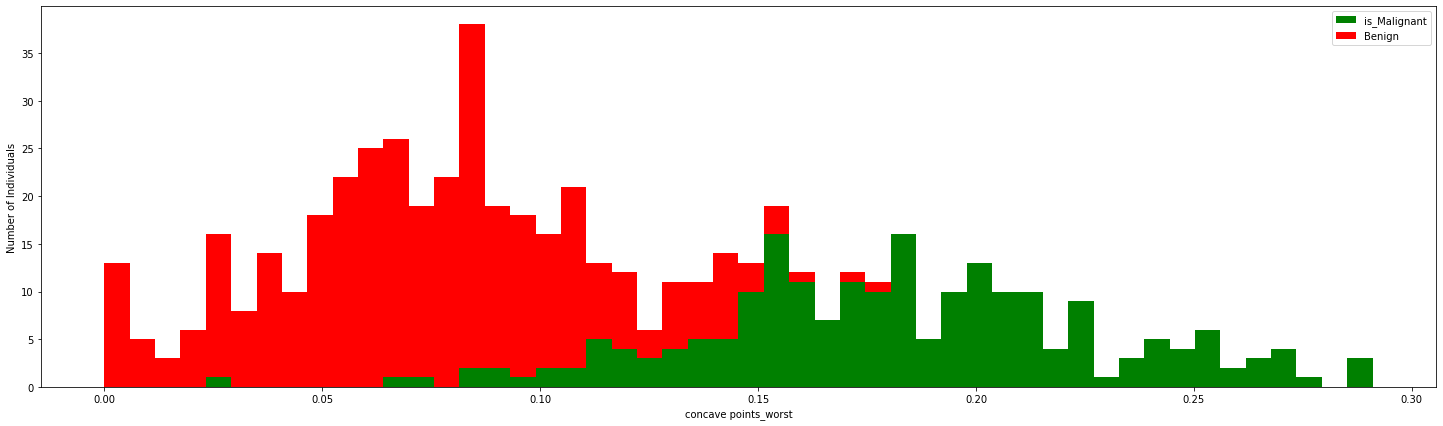

In [31]:
malig("concave points_worst")
# malig function with concave points_worst feature as variable

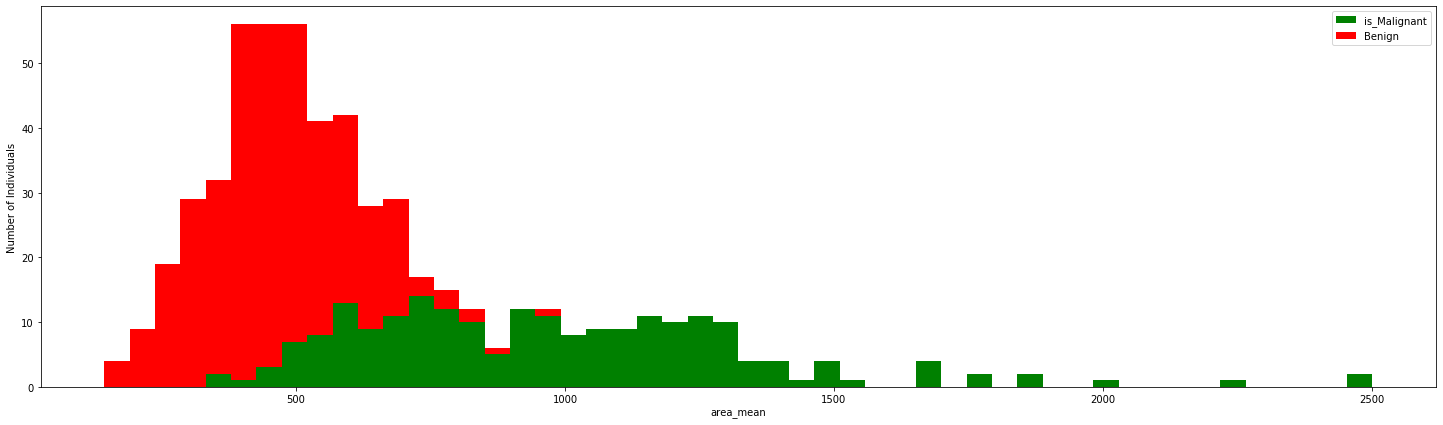

In [32]:
malig("area_mean")
# malig function with area_mean feature as variable

In [33]:

regressionFeatures = df.select_dtypes(include='float').columns
df_regressionFeatures = pd.DataFrame(data=MinMaxScaler().fit_transform(df[regressionFeatures]), columns=regressionFeatures)

dfFull = pd.concat([df[['is_Malignant']], df_regressionFeatures], axis=1)
print(dfFull)
#setting the regression features as the features that are floats

     is_Malignant  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            True     0.521037      0.022658        0.545989   0.363733   
1            True     0.643144      0.272574        0.615783   0.501591   
2            True     0.601496      0.390260        0.595743   0.449417   
3            True     0.210090      0.360839        0.233501   0.102906   
4            True     0.629893      0.156578        0.630986   0.489290   
..            ...          ...           ...             ...        ...   
564          True     0.690000      0.428813        0.678668   0.566490   
565          True     0.622320      0.626987        0.604036   0.474019   
566          True     0.455251      0.621238        0.445788   0.303118   
567          True     0.644564      0.663510        0.665538   0.475716   
568         False     0.036869      0.501522        0.028540   0.015907   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.593753

In [34]:
features = dfFull.columns.drop(["is_Malignant"])
target = 'is_Malignant'
# took out is_Malignant for testing with algorithms

At first we used the classification algoritms with all the features to see what kind of scores we would get. We thought of only using features above 25% correlation but decided to use all of them to see what the output would be.
Suprisingly we got very high percentages with leaving all the features in.

In [35]:
lenTrain, lenVal = 200, 150
train, test = train_test_split(dfFull, random_state=42, test_size=len(dfFull)-lenTrain-lenVal)
train, val = train_test_split(train, random_state=42, test_size=lenVal)
#split the training, testingn and val sets using a random_state.

In [36]:
X_train, X_val, X_test = train[features], val[features], test[features]
y_train, y_val, y_test = train[target], val[target], test[target]
#set the train, val, and test input and outputs

In [37]:
lin, linParam = SGDClassifier(random_state=42), {'max_iter': [800, 900, 1000, 1100, 1200]}
knn, knnParam = KNeighborsClassifier(), {'n_neighbors': range(1, 100, 3), 'weights': ['uniform','distance']}
tree, treeParam = DecisionTreeClassifier(random_state=42), {}
gnb, gnbParam = GaussianNB(), {}
svm, svmParam = SVC(random_state=42, gamma='auto'), {'C': [1, 10, 100, 1000], 'kernel': ['rbf', 'linear']}
rfc, rfcParam = RandomForestClassifier(), {'n_estimators': [5, 10, 15], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 
                                           'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}
abc, abcParam = AdaBoostClassifier(random_state=42), {'n_estimators': range(1, 100, 10)}
bc, bcParam = BaggingClassifier(random_state=42), {'base_estimator': [svm, knn, tree], 'n_estimators': range(1, 100, 10)}
classifiers = [[lin, linParam], [knn, knnParam], [tree, treeParam], [gnb, gnbParam], [svm, svmParam], 
               [rfc, rfcParam], [abc, abcParam], [bc, bcParam]]
#set up the algorithms for use with parameters we chose, also chose our classifiers

In [38]:
topEstimator=[None, None, None]
topScores=[0, 0, 0]

for classifier in classifiers:
    grid = GridSearchCV(
        estimator=classifier[0], param_grid=classifier[1],
        scoring="precision", cv=5,
        iid=True
    )
    grid.fit(X_train, y_train)
    
    for i in range(0, len(topScores)):
        if grid.best_score_ > topScores[i]:
            if i != len(topScores)-1 and topScores[i] > topScores[i+1]:
                continue
            else:
                topEstimator[i] = grid.best_estimator_
                topScores[i] = grid.best_score_
                break
    
    print (grid.best_estimator_)
    print (grid.best_score_)
    
print('The top three estimators:')
print(topEstimator)
print(topScores)
# Used gridsearch with the algorithms we picked, with a loop that printed the top estimator with its corresponing best score.
# Our best three algoritms were SVC, KNeighborsClassifier, and RandomForestClassifier.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=800, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.9294210526315788
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       

In [39]:
corr_matrix = df.corr().loc[df.corr()['is_Malignant'] == 1].abs()

to_drop = []
for column in corr_matrix.columns:
    if float(corr_matrix[[column]].loc['is_Malignant']) < .25:
        to_drop.append(column)

feat_select = X_train.columns.drop(to_drop)

X_feat_train, X_feat_val, X_feat_test = X_train[feat_select], X_val[feat_select], X_test[feat_select]
#took out any features that had less than a 25% correlation to see how the scores would change

In [40]:
topClassifier = None
topScore = 0
for classifier in topEstimator:
    classifier.fit(X_feat_train, y_train)
    y_prediction = classifier.predict(X_feat_val)
    score = precision_score(y_val, y_prediction)
    
    if score > topScore:
        topClassifier = classifier
        topScore = score
    
    print (classifier)
    print (score)
# used the validation set with our top classifiers after removal of features below 25% correlation

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
1.0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
0.9636363636363636
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9272727272727272


In [41]:
topClassifier.fit(X_feat_train, y_train)
y_prediction = topClassifier.predict(X_feat_test)
score = precision_score(y_test, y_prediction)
print (topClassifier)
print (score)
#used our best classifier(SVC) on our test set.

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
0.9864864864864865


In the end our best classification algoritm was SVC, it performed well on our training set, our validation set, and our test set. The scores for each respenctive set were: (1.0,1.0, and 0.9864864864864865)

It seems that using SVC with the same proccess of gathering data would be a highly accurate way to detrmine the type of tumor an individual has.